# Week 3 Homework - Barcode detection
**Author: LinhLPV, 16021023**

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import imutils

In [2]:
plt.rcParams['figure.figsize'] = [9, 6]

In [3]:
def barcode_detector_for_fig_one(img=None):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Canny(img, 200, 300)
    (_, img) = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    plt.imshow(img)
    
    kernel = np.ones((9, 9),np.uint8)
    T = 2
    for i in range(T):
        dilation = cv2.dilate(img,kernel,iterations = 1)
    img = dilation
    (_, thresh) = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    img = cv2.GaussianBlur(thresh,(9,9),cv2.BORDER_DEFAULT)
    (cnts, _) = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    rect = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    return box

In [4]:
def show(img=None, box=None):
    cv2.drawContours(img, [box], -1, (0, 255, 0), 3)
    plt.imshow(img)

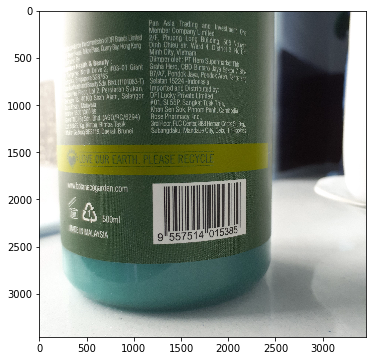

In [5]:
img1 = cv2.imread('01.jpg')

plt.imshow(img1, cmap='gray')

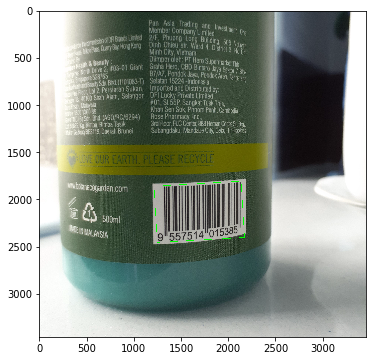

In [6]:
box = barcode_detector_for_fig_one(img1)
show(img1, box)


In [18]:
def pre_processing(img):
    
    return cv2.resize(img, (640,480))

def cal_gradient(img=None):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
    X = cv2.Sobel(img, ddepth=ddepth, dx=1, dy=0, ksize=-1)
    Y = cv2.Sobel(img, ddepth=ddepth, dx=0, dy=1, ksize=-1)
    img = cv2.subtract(X, Y)
    img = cv2.convertScaleAbs(img)
    img = cv2.GaussianBlur(img,(9,9),cv2.BORDER_DEFAULT)
    return img

def threshold_(img, min_, max_):
    (_, thresh) = cv2.threshold(img, min_, max_, cv2.THRESH_BINARY)
    thresh = cv2.GaussianBlur(thresh,(9,9),cv2.BORDER_DEFAULT)
    return thresh

def morpho(img, size, T):
    kernel = np.ones((size, size),np.uint8)
    for i in range(T):
        dilation = cv2.dilate(img,kernel,iterations = 1)
    for i in range(T):
        ero = cv2.erode(img, kernel, iterations = 1)
    img = dilation
    (_, thresh) = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    img = cv2.GaussianBlur(thresh,(9,9),cv2.BORDER_DEFAULT)

    return img

def find_area(img, max_area, min_area, max_ratio, min_ratio):
    (cnts, _) = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    index = 0
    for i, cnt in enumerate(cnts):
        rect = cv2.minAreaRect(cnt)
        (x, y), (width, height), angle = rect
        aspect_ratio = max(width, height) / min(width, height)
        area = width*height
        print(aspect_ratio, area, '.')
        if aspect_ratio > min_ratio and aspect_ratio < max_ratio and area > min_area  and area < max_area:
            index = i
            print(aspect_ratio, width, height, 'dome')
            break
        else:
            print('')
    c = cnts[index]
    rect = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    return box


In [19]:
img3 = cv2.imread('03.jpg')
img3 = pre_processing(img3)

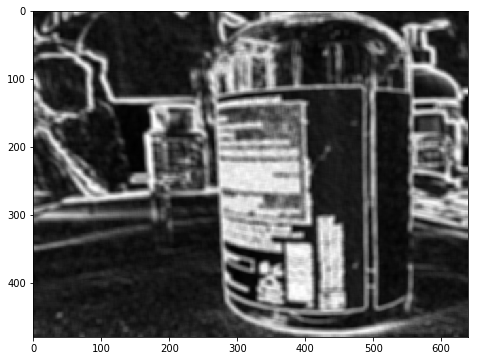

In [20]:
gradient = cal_gradient(img3)
plt.imshow(gradient, cmap='gray')


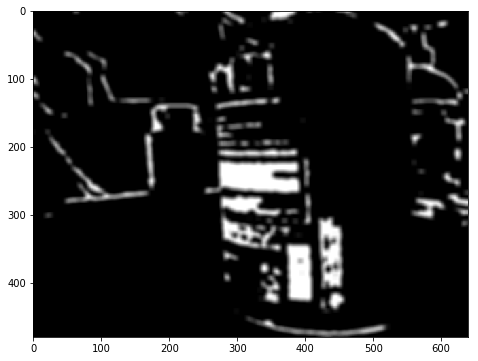

In [21]:
thres = threshold_(gradient, 200, 255)
plt.imshow(thres, cmap='gray')

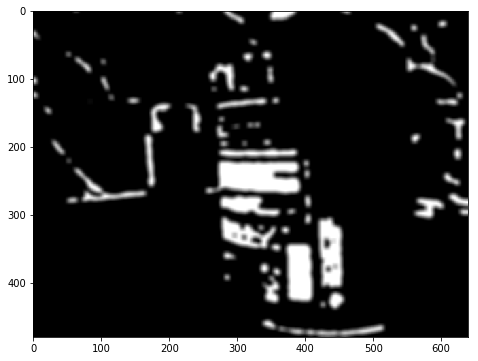

In [22]:
mo_ = morpho(thres, 1, 3)
plt.imshow(mo_, cmap='gray')

In [23]:
box = find_area(mo_,5000, 4000, 3, 2)
print(box)

7.29345728714327 4723.009456121363 .

1.0 196.0 .

1.7777777777777777 2304.0 .

1.4375 368.0 .

2.0727527102524292 4006.250818748056 .
2.0727527102524292 43.963809967041016 91.12610626220703 dome
[[371 431]
 [368 340]
 [412 338]
 [415 429]]


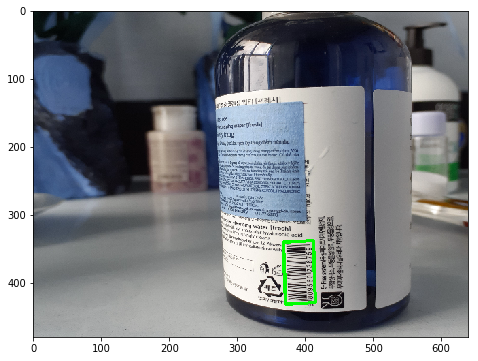

In [24]:
show(img3, box)